In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1. (12 점) csv 파일을 다운로드 받고 pandas를 이용하여 불러오기

#### Task 1-1. (6 점) 데이터 불러오기

In [2]:
covid_df = pd.read_csv("./owid-covid-data.csv")
covid_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


#### Task 1-2. (6 점) ‘date’ 열의 데이터를 날짜 타입으로 변경하기

In [3]:
print(covid_df['date'].dtype)

object


In [4]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
print(covid_df['date'].dtype)

datetime64[ns]


In [5]:
covid_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Task 2. (32 점) (한국과 일본의 코로나 상황과 대응 차이는 어떨까?) 한국(South Korea)과 일본(Japan)의 코로나 상황 비교 시각화하기

#### Task 2-1. (8 점) 날짜별 확진자 비율 (total_cases_per_million) 시각화

In [6]:
total_by_date = covid_df[['location', 'total_cases_per_million', 'date']]
korea_by_date = total_by_date.loc[total_by_date['location'] == 'South Korea', :]
japan_by_date = total_by_date.loc[total_by_date['location'] == 'Japan', :]

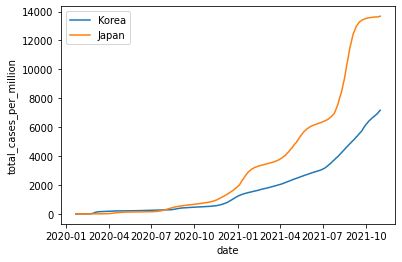

In [7]:
plt.plot(korea_by_date['date'], korea_by_date['total_cases_per_million'], label='Korea')
plt.plot(japan_by_date['date'], japan_by_date['total_cases_per_million'], label='Japan')
plt.axis()
plt.xlabel("date")
plt.ylabel("total_cases_per_million")
plt.legend()
plt.show()

#### Task 2-2. (8 점) 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화

In [8]:
new_by_date = covid_df[['location', 'new_cases_per_million', 'date']]
knew_by_date = new_by_date.loc[new_by_date['location'] == 'South Korea', :]
jnew_by_date = new_by_date.loc[new_by_date['location'] == 'Japan', :]

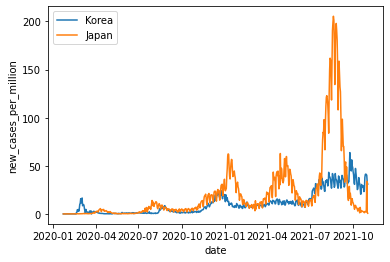

In [9]:
plt.plot(knew_by_date['date'], knew_by_date['new_cases_per_million'], label='Korea')
plt.plot(jnew_by_date['date'], jnew_by_date['new_cases_per_million'], label='Japan')
plt.axis()
plt.xlabel("date")
plt.ylabel("new_cases_per_million")
plt.legend()
plt.show()

#### Task 2-3. (8 점) 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화

In [10]:
vac_by_date = covid_df[['location', 'people_vaccinated_per_hundred', 'date']]
kvac_by_date = vac_by_date.loc[vac_by_date['location'] == 'South Korea', :].fillna(method='ffill')
jvac_by_date = vac_by_date.loc[vac_by_date['location'] == 'Japan', :].fillna(method='ffill')

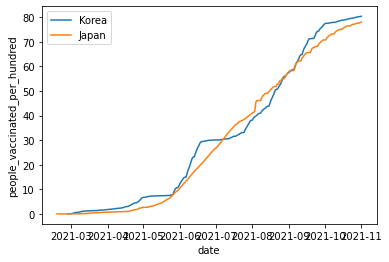

In [11]:
plt.plot(kvac_by_date['date'], kvac_by_date['people_vaccinated_per_hundred'], label='Korea')
plt.plot(jvac_by_date['date'], jvac_by_date['people_vaccinated_per_hundred'], label='Japan')
plt.xlabel("date")
plt.ylabel("people_vaccinated_per_hundred")
plt.legend()
plt.show()

#### Task 2-4. (8 점) 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred) 시각화

In [12]:
full_by_date = covid_df[['location', 'people_fully_vaccinated_per_hundred', 'date']]
kful_by_date = full_by_date.loc[full_by_date['location'] == 'South Korea', :].fillna(method='ffill')
jful_by_date = full_by_date.loc[full_by_date['location'] == 'Japan', :].fillna(method='ffill')

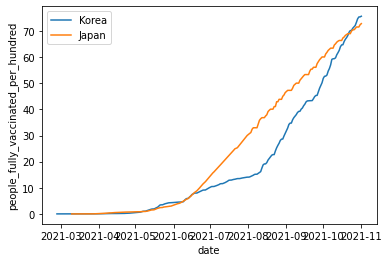

In [13]:
plt.plot(kful_by_date['date'], kful_by_date['people_fully_vaccinated_per_hundred'], label='Korea')
plt.plot(jful_by_date['date'], jful_by_date['people_fully_vaccinated_per_hundred'], label='Japan')
plt.axis()
plt.xlabel("date")
plt.ylabel("people_fully_vaccinated_per_hundred")
plt.legend()
plt.show()

## Task 3. (31 점) (백신 접종은 사망률을 낮출까?) 백신 접종률(people_vaccinated_per_hundred)과 확진자 비율 대비 사망자 비율(total_deaths_per_million/total_cases_per_million) 사이의 상관관계 알아보기

#### Task 3-1. (5 점) Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기

In [14]:
sur_by_vac = covid_df[['location', 'date', 'total_deaths_per_million', 'total_cases_per_million', 'people_vaccinated_per_hundred', 'human_development_index']]
sur_by_vac.head(5)

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511


#### Task 3-2. (6 점) 각 국가별로 가장 최근 날짜의 데이터 추출하기 (Hint! pandas의 groupby와 max활용)

In [15]:
by_country = sur_by_vac.groupby(by=sur_by_vac['location']).max()
by_country

,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,,
Afghanistan,2021-11-01,182.777,3923.241,6.06,0.511
Africa,2021-11-01,159.008,6191.136,8.93,NaN
Albania,2021-11-01,1020.211,64567.094,35.29,0.795
Algeria,2021-11-01,132.776,4629.799,14.26,0.748
Andorra,2021-11-01,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
Wallis and Futuna,2021-11-01,NaN,NaN,53.52,NaN
World,2021-11-01,635.699,31383.570,49.63,0.737
Yemen,2021-11-01,61.986,321.377,1.07,0.470


#### Task 3-3. (10 점) 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


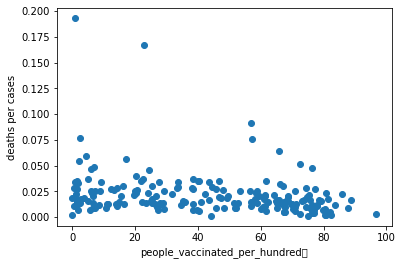

In [16]:
plt.scatter(by_country['people_vaccinated_per_hundred'], by_country['total_deaths_per_million']/by_country['total_cases_per_million'])
plt.xlabel('people_vaccinated_per_hundred	')
plt.ylabel('deaths per cases')
plt.show()

#### Task 3-4. (10 점) 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)

In [17]:
def pearson_similarity(u1, u2):
  u1_c = u1 - u1.mean()
  u2_c = u2 - u2.mean()
  denom = np.sqrt(np.sum(u1_c ** 2) * np.sum(u2_c ** 2))
  if denom != 0:
    return np.sum(u1_c * u2_c)/denom
  else:
    return 0

In [18]:
pearson_similarity(by_country['people_vaccinated_per_hundred'], by_country['total_deaths_per_million']/by_country['total_cases_per_million'])

-0.23185178247436014

## Task 4. (25 점) (백신 접종은 전세계적으로 골고루 이뤄지고 있을까?) HDI 계수 (human_development_index)와 백신 접종률(people_vaccinated_per_hundred) 사이의 상관관계 알아보기 (Task 3-2 에서 구한 데이터프레임 활용)

#### Task 4-1. (5 점) Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기

In [19]:
pearson_similarity(by_country['human_development_index'], by_country['people_vaccinated_per_hundred'])

0.7250351729877785

#### Task 4-2. (10점) Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)

In [20]:
import torch

In [21]:
x = torch.FloatTensor(by_country['human_development_index'].fillna(by_country['human_development_index'].mean())).view(233,1)
y = torch.FloatTensor(by_country['people_vaccinated_per_hundred'].fillna(by_country['human_development_index'].mean())).view(233,1)

In [22]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.01

for epoch in range(25000):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x, W) + b
  cost = torch.mean((hypothesis - y) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  if epoch % 100 == 0:
    print('epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch, cost.item(), W, b))

print('W: {}, b: {}'.format(W, b))

epoch: 0, cost: 2844.468018, W: tensor([[0.7090]]), b: tensor([[0.9065]])
epoch: 100, cost: 670.977966, W: tensor([[24.2530]]), b: tensor([[26.8574]])
epoch: 200, cost: 653.648987, W: tensor([[28.0836]]), b: tensor([[25.9930]])
epoch: 300, cost: 641.258667, W: tensor([[30.9649]]), b: tensor([[23.9732]])
epoch: 400, cost: 629.450195, W: tensor([[33.7401]]), b: tensor([[21.9479]])
epoch: 500, cost: 618.188293, W: tensor([[36.4486]]), b: tensor([[19.9677]])
epoch: 600, cost: 607.447693, W: tensor([[39.0937]]), b: tensor([[18.0338]])
epoch: 700, cost: 597.204285, W: tensor([[41.6768]]), b: tensor([[16.1452]])
epoch: 800, cost: 587.434937, W: tensor([[44.1994]]), b: tensor([[14.3007]])
epoch: 900, cost: 578.117798, W: tensor([[46.6629]]), b: tensor([[12.4995]])
epoch: 1000, cost: 569.231873, W: tensor([[49.0687]]), b: tensor([[10.7405]])
epoch: 1100, cost: 560.757385, W: tensor([[51.4182]]), b: tensor([[9.0226]])
epoch: 1200, cost: 552.675110, W: tensor([[53.7127]]), b: tensor([[7.3450]])
e

#### Task 4-3. (10점) HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기 (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지 확인)

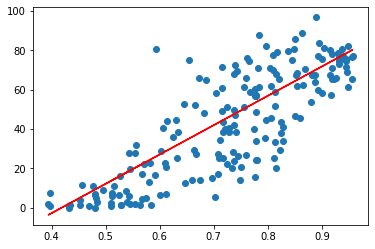

In [23]:
plt.scatter(by_country['human_development_index'], by_country['people_vaccinated_per_hundred'])
plt.plot(x, W.item()*x + b.item(), c='red')
plt.show()